In [42]:
# ALPHA_API_KEY
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"

data2 = requests.get(url)

print(api_key)

X0A7FGYVDVMVF3WK


In [43]:
data2

<Response [200]>

In [13]:
data = data.json()

In [23]:
df = pd.DataFrame(data["Time Series (Daily)"]).transpose().astype(float)

df.index

Index(['2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26', '2021-10-25',
       '2021-10-22', '2021-10-21', '2021-10-20', '2021-10-19', '2021-10-18',
       ...
       '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09', '1999-11-08',
       '1999-11-05', '1999-11-04', '1999-11-03', '1999-11-02', '1999-11-01'],
      dtype='object', length=5536)

In [28]:
df.index = pd.to_datetime(df.index)

print(df.index.dtype)

df.head()

datetime64[ns]


,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0


In [33]:
df.loc["2021-10"]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.9400,146.4128,149.80,124953168.0
2021-10-28,149.820,153.1650,149.7200,152.57,100077888.0
2021-10-27,149.360,149.7300,148.4900,148.85,56094929.0
2021-10-26,149.330,150.8400,149.0101,149.32,60893395.0
2021-10-25,148.680,149.3700,147.6211,148.64,50720556.0
2021-10-22,149.690,150.1800,148.6400,148.69,58883443.0
2021-10-21,148.810,149.6400,147.8700,149.48,61420990.0
2021-10-20,148.700,149.7539,148.1200,149.26,58418788.0
2021-10-19,147.010,149.1700,146.5500,148.76,76378894.0
2021-10-18,143.445,146.8400,143.1600,146.55,85589175.0


In [36]:
df["2021-10-20":"2021-10-29"]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0
2021-10-22,149.690,150.180,148.6400,148.69,58883443.0
2021-10-21,148.810,149.640,147.8700,149.48,61420990.0


In [49]:
import time
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "TSLA", "NVDA", "IBM"]

stock_list = []

for symbol in symbols:
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)
    time.sleep(10)



In [50]:
stock_list

[2021-10-29    149.80
 2021-10-28    152.57
 2021-10-27    148.85
 2021-10-26    149.32
 2021-10-25    148.64
                ...  
 1999-11-05     88.31
 1999-11-04     83.62
 1999-11-03     81.50
 1999-11-02     80.25
 1999-11-01     77.62
 Name: AAPL, Length: 5536, dtype: float64,
 2021-10-29    1114.00
 2021-10-28    1077.04
 2021-10-27    1037.86
 2021-10-26    1018.43
 2021-10-25    1024.86
                ...   
 2010-07-06      16.11
 2010-07-02      19.20
 2010-07-01      21.96
 2010-06-30      23.83
 2010-06-29      23.89
 Name: TSLA, Length: 2856, dtype: float64,
 2021-10-29    255.67
 2021-10-28    249.41
 2021-10-27    244.51
 2021-10-26    247.17
 2021-10-25    231.66
                ...  
 1999-11-05     28.25
 1999-11-04     29.19
 1999-11-03     27.44
 1999-11-02     25.00
 1999-11-01     23.50
 Name: NVDA, Length: 5536, dtype: float64,
 2021-10-29    125.10
 2021-10-28    125.84
 2021-10-27    125.17
 2021-10-26    127.13
 2021-10-25    127.64
                ...  
 1

In [59]:
stocks = pd.read_csv("stocks.csv", index_col = 0, parse_dates = True)

#stocks.index = pd.to_datetime(stocks.index)

stocks.index

DatetimeIndex(['2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26',
               '2021-10-25', '2021-10-22', '2021-10-21', '2021-10-20',
               '2021-10-19', '2021-10-18',
               ...
               '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09',
               '1999-11-08', '1999-11-05', '1999-11-04', '1999-11-03',
               '1999-11-02', '1999-11-01'],
              dtype='datetime64[ns]', length=5536, freq=None)

In [60]:
stocks.loc["2020"]

,AAPL,TSLA,NVDA,IBM
2020-12-31,132.69,705.67,522.20,125.88
2020-12-30,133.72,694.78,525.83,124.34
2020-12-29,134.87,665.99,517.73,123.80
2020-12-28,136.69,663.69,516.00,124.82
2020-12-24,131.97,661.77,519.75,124.69
...,...,...,...,...
2020-01-08,303.19,492.14,240.38,135.31
2020-01-07,298.39,469.06,239.93,134.19
2020-01-06,299.80,451.54,237.06,134.10
2020-01-03,297.43,443.01,236.07,134.34


(2, 2)


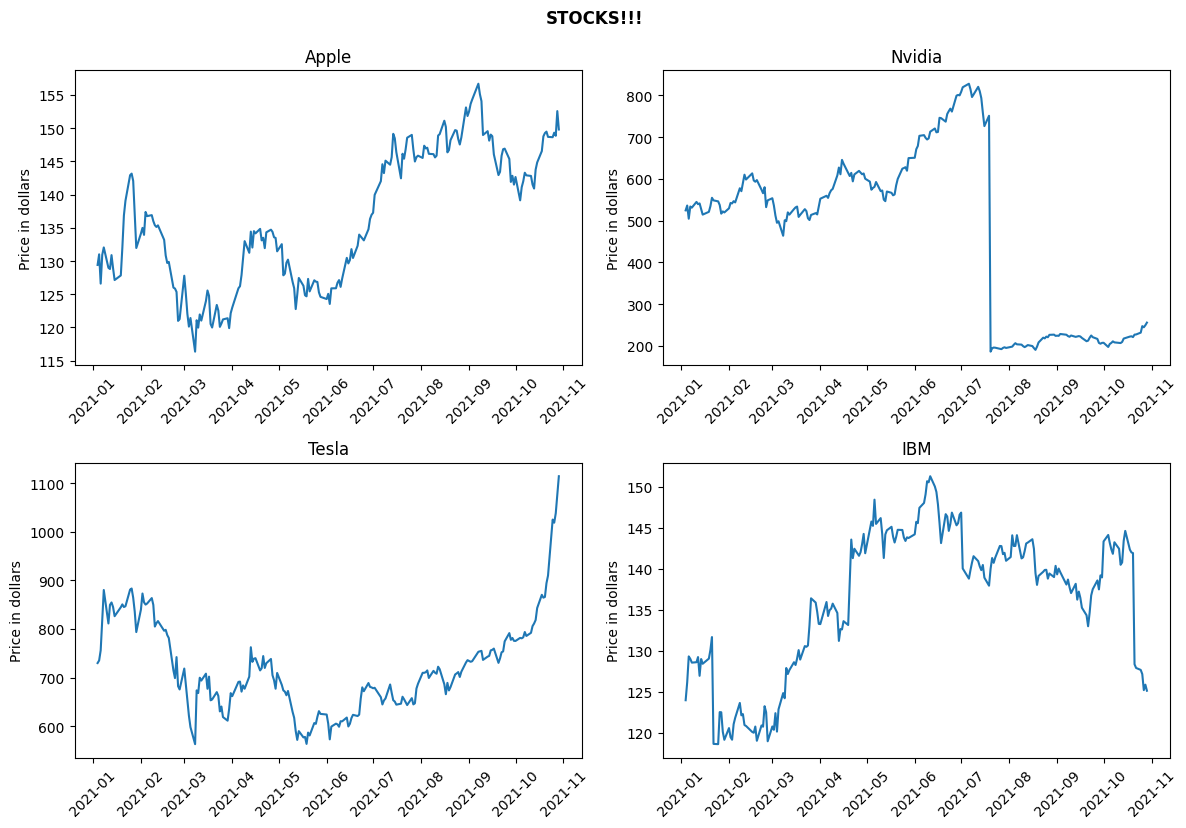

In [74]:
fig, ax = plt.subplots(2, 2, dpi = 100, figsize = (12, 8))

print(ax.shape)

#ax = ax.flatten()

#print(ax.shape)

stock_names = dict(AAPL = "Apple", NVDA = "Nvidia", TSLA = "Tesla", IBM = "IBM")

stocks_2021 = stocks.loc["2021"]

for ax, symbol in zip(ax.flatten(), stock_names):
    sns.lineplot(data = stocks_2021, x = stocks_2021.index, y = symbol, ax = ax)
    ax.tick_params(axis = "x", rotation = 45)
    ax.set(title = f"{stock_names[symbol]}", ylabel = "Price in dollars")

fig.tight_layout()
fig.suptitle("STOCKS!!!", y = 1.03, fontweight = "bold")
fig.savefig("stoks.png", facecolor = "white")